In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor='white')

datadir = ''

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='hartmann',
    data_path=datadir + '/hartmann/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|█████████████████████████████████████████████████████████████████████████| 58/58 [00:03<00:00, 18.67it/s]

Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036

 Celldata metadata: {'lateral_resolution': 0.390625, 'fn': ['scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv', 'scMEP_sample_description.xlsx'], 'image_col': 'point', 'pos_cols': ['center_colcoord', 'center_rowcoord'], 'cluster_col': 'Cluster', 'cluster_col_preprocessed': 'Cluster_preprocessed', 'patient_col': 'donor'}


# Cell-type centric summary statistics in MIBI TOF - cancer dataset. 

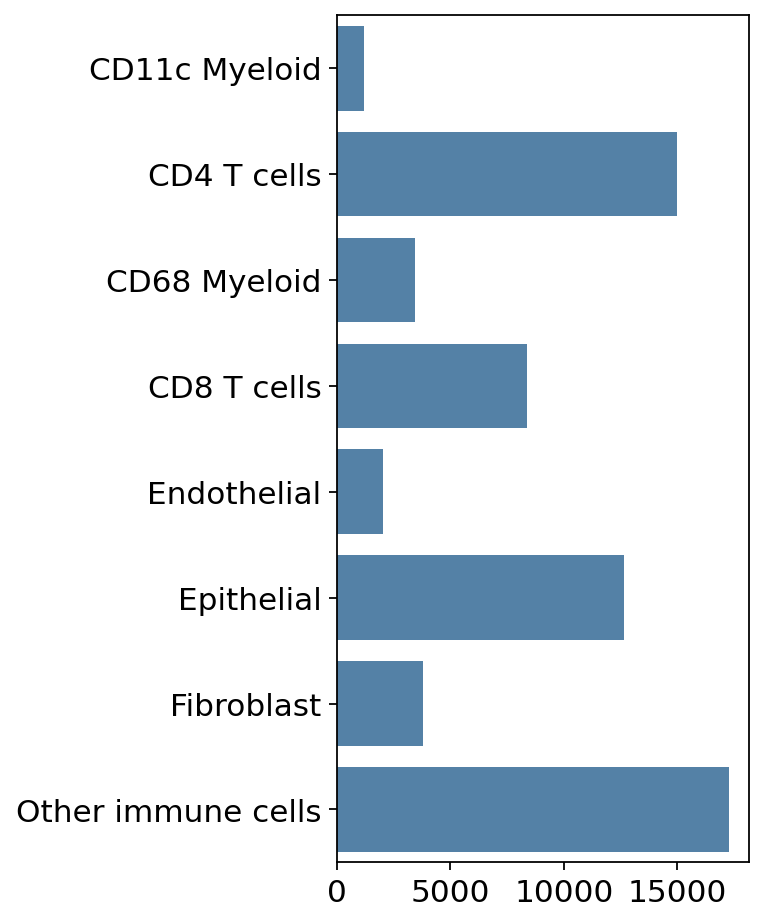

In [3]:
interpreter.data.celltype_frequencies()

0.0
5.400087997636394
10.193272571484671
50.84876334980765
410.52044893209495
1099.0862068965516


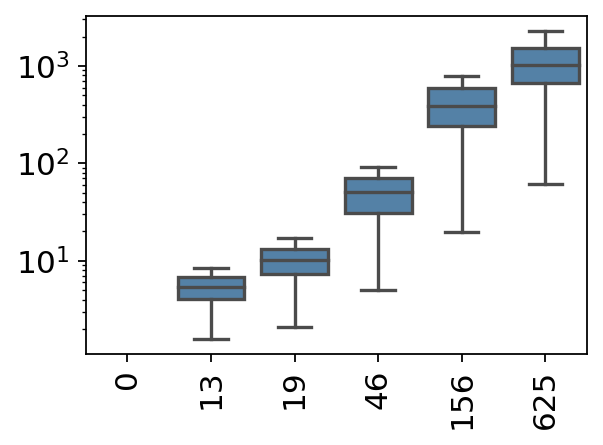

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 35, 50, 120, 400, 1600],
    lateral_resolution=400/1024,
)

# Variance decomposition in MIBI TOF - cancer dataset.

100%|█████████████████████████████████████████████████████████████████████████| 58/58 [00:39<00:00,  1.48it/s]


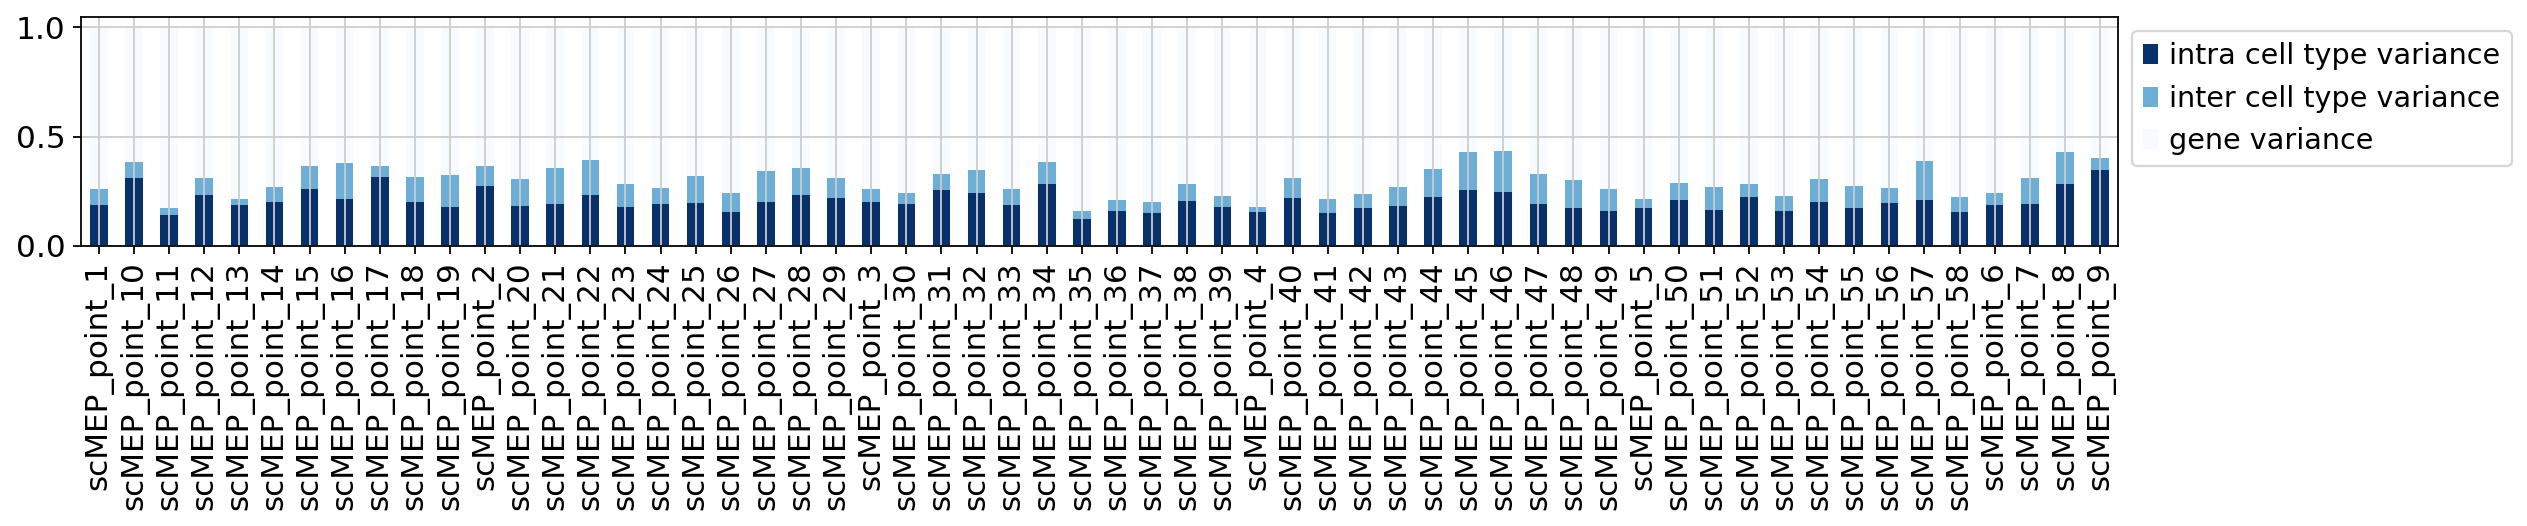

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(var_decomp)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.203625
inter cell type variance    0.092683
gene variance               0.703692
dtype: float32

# Normalised contact frequencies of cell-types in spatial neighborhoods.

100%|█████████████████████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 52.19it/s]


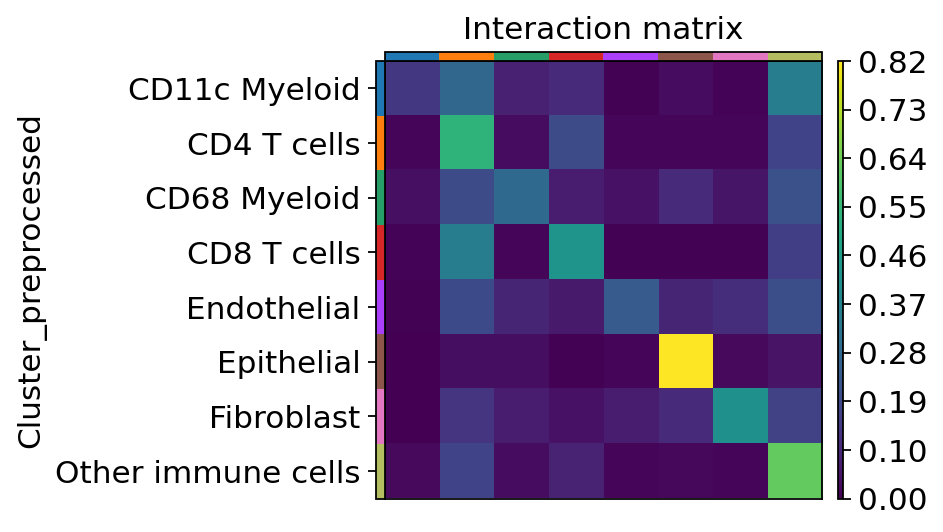

In [7]:
interpreter.data.celldata_interaction_matrix(figsize=(3,3))

# Ligand–receptor permutation test. 

n cells: 25498


100%|███████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 181.00permutation/s]


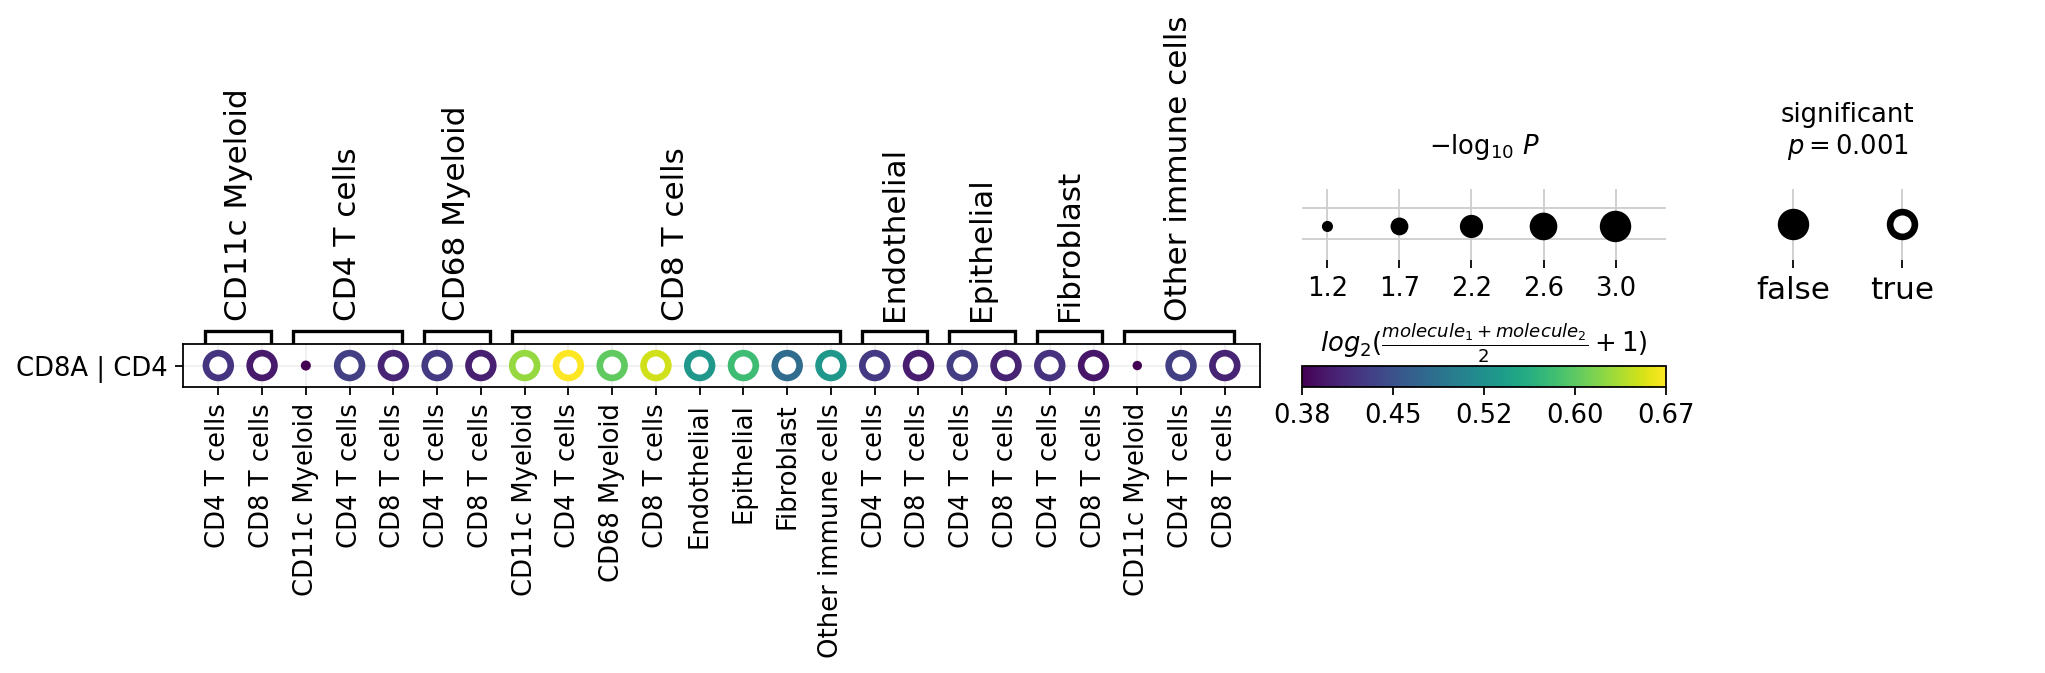

In [8]:
adata = interpreter.data.ligrec(
    fraction=0.40,
)

# Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

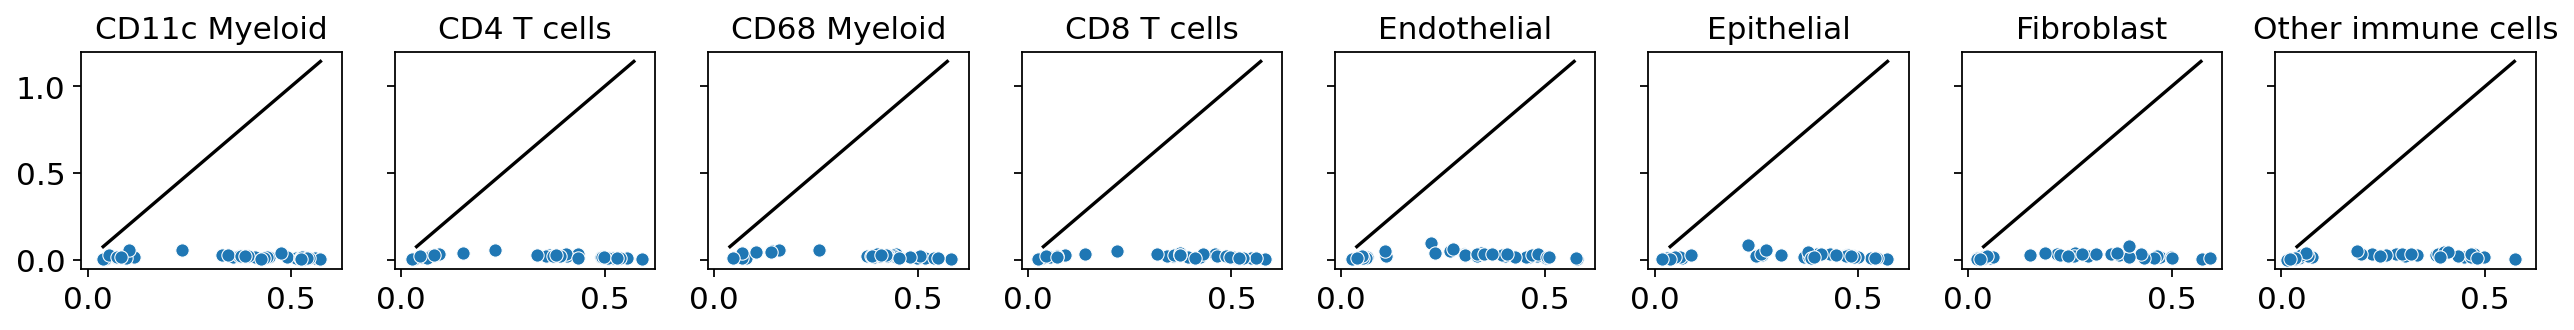

In [9]:
interpreter.data.noise_structure()

# Attributing cell heterogeneity to niche composition in CD8 Tcells in colorectal cancer.

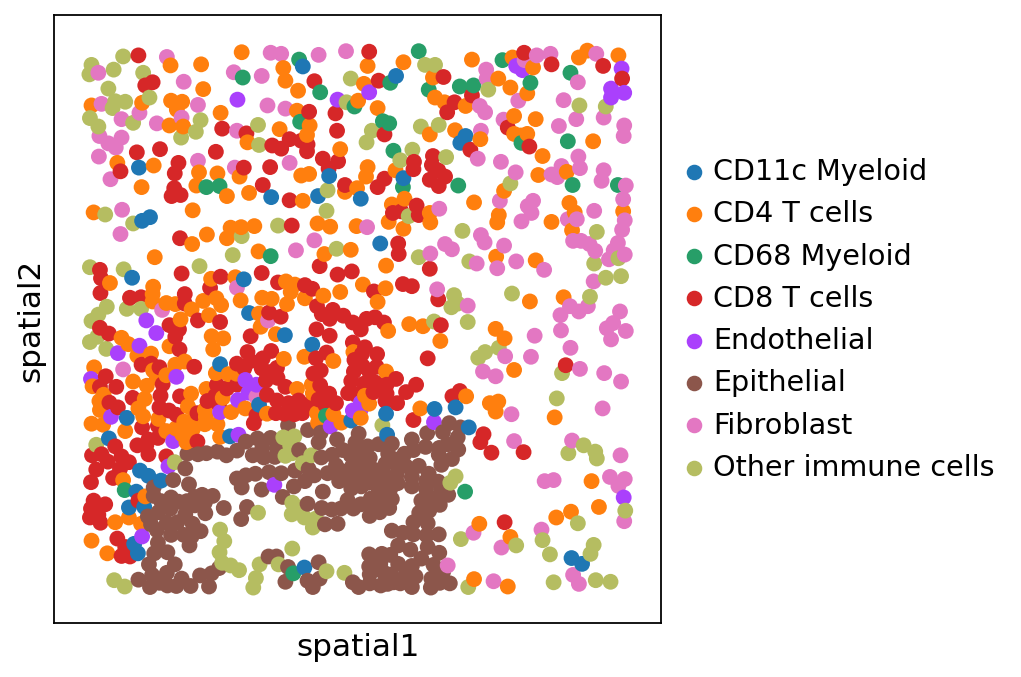

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sc.pl.spatial(
    interpreter.data.img_celldata['scMEP_point_16'],
    color='Cluster_preprocessed',
    spot_size=30,
    title='',
    ax=ax,
    show=False,
)
plt.show()